### Objetivo: Criar modelos de classificação (decision tree e regressão logística) que determinem os sobreviventes do naufrágio do Titanic.

#### 1º - Importar pacotes

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pacotes de machine learning

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree

#### 2º - Pegar a base de dados

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Supervised-Learning/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3º - Summary da base de dados

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 4º - Ver os data types das colunas

In [69]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 5º - Checar se as colunas têm valores nulos

In [70]:
df.isnull().mean()

    # Colunas sem informações: Age, Cabin, Embarked

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### 6º - Remover as colunas PassengerId, Name e Ticket. Porque não têm informações importantes

In [71]:
df = df.drop(['PassengerId','Name','Ticket'], axis = 1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### 7º - Coluna Pclass: Transformar a coluna em dummy, pois é uma categoria.

In [72]:
    # Fazer os dummies
    
Pclass_one_hot = pd.get_dummies(df['Pclass'])

    # Colocar as colunas dummies no data frame
    
df = df.join(Pclass_one_hot)

    # Renomear colunas dummies
    
df = df.rename(columns = {1:'Class_1',2:'Class_2',3:'Class_3',})

    # Remover a coluna original Pclass
    
df = df.drop('Pclass', axis = 1)

    # Remover a coluna Class_3, pois não traz informações adicionais

df = df.drop('Class_3', axis = 1)

In [73]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2
0,0,male,22.0,1,0,7.2500,NaN,S,0,0
1,1,female,38.0,1,0,71.2833,C85,C,1,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0
3,1,female,35.0,1,0,53.1000,C123,S,1,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0


#### 8º - Coluna Sex: Transformar a coluna em dummy, pois é uma categoria.

In [74]:
    # Fazer os dummies
    
sex_one_hot = pd.get_dummies(df['Sex'])

    # Colocar as colunas dummies no data frame
    
df = df.join(sex_one_hot)

    # Renomear colunas dummies
    
df = df.rename(columns = {1:'Female',2:'Male'})

    # Remover a coluna original Sex
    
df = df.drop('Sex', axis = 1)

    # Remover a coluna male, pois não traz informações adicionais (já existe a coluna female)

df = df.drop('male', axis = 1)

In [75]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2,female
0,0,22.0,1,0,7.2500,NaN,S,0,0,0
1,1,38.0,1,0,71.2833,C85,C,1,0,1
2,1,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,35.0,1,0,53.1000,C123,S,1,0,1
4,0,35.0,0,0,8.0500,NaN,S,0,0,0


#### 9º - Coluna Embarked: Transformar a coluna em dummy, pois é uma categoria.

In [76]:
    # Coloque os nan como Unknown

df['Embarked'] = df['Embarked'].replace(np.nan,'Unknown')
    
    # Fazer os dummies
    
embarked_one_hot = pd.get_dummies(df['Embarked'])

    # Colocar as colunas dummies no data frame
    
df = df.join(embarked_one_hot)

    # Renomear colunas dummies
    
df = df.rename(columns = {'C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S','Unknown':'Embarked_nan'})

    # Remover a coluna original Embarked
    
df = df.drop('Embarked', axis = 1)

    # Remover a coluna Embarked_nan, pois não traz informações adicionais

df = df.drop('Embarked_nan', axis = 1)

In [77]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,female,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,NaN,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,C85,1,0,1,1,0,0
2,1,26.0,0,0,7.9250,NaN,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,C123,1,0,1,0,0,1
4,0,35.0,0,0,8.0500,NaN,0,0,0,0,0,1


#### 10º - Coluna Cabin: Criar uma nova coluna com o Deck

In [78]:
    # Criando a coluna 
    
df['Deck'] = df['Cabin'].str[0]

    # Coloque os nan como Unknown
    
df['Deck'] = df['Deck'].replace(np.nan,'Unknown')

    # Remover a coluna original Cabin
    
df = df.drop('Cabin', axis = 1)

In [79]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,female,Embarked_C,Embarked_Q,Embarked_S,Deck
0,0,22.0,1,0,7.2500,0,0,0,0,0,1,Unknown
1,1,38.0,1,0,71.2833,1,0,1,1,0,0,C
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,Unknown
3,1,35.0,1,0,53.1000,1,0,1,0,0,1,C
4,0,35.0,0,0,8.0500,0,0,0,0,0,1,Unknown


#### 11º - Coluna Deck: Transformar a coluna em dummy, pois é uma categoria.

In [80]:
    # Fazer os dummies
    
deck_one_hot = pd.get_dummies(df['Deck'])
    # Colocar as colunas dummies no data frame
    
df = df.join(deck_one_hot)

    # Renomear colunas dummies
df = df.rename(columns = {'A':'Deck_A','B':'Deck_B','C':'Deck_C','D':'Deck_D','E':'Deck_E','F':'Deck_F','G':'Deck_G','T':'Deck_T','Unknown':'Deck_nan'})

    # Remover a coluna original Deck
    
df = df.drop('Deck', axis = 1)

    # Remover a coluna Deck_nan, pois não traz informações adicionais

df = df.drop('Deck_nan', axis = 1)

In [81]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,female,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,22.0,1,0,7.2500,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### 12º - Coluna Age: Imputar valores nulos

In [82]:
    # Imputar valores nulos com a média de idade de acordo com o Fare. Teoria: pessoas mais velhas teriam mais dinheiro para pagar por quartos melhores.
    
df['Age'] = df.groupby('Fare')['Age'].transform(lambda x: x.fillna(x.mean()))

    # Conferir se tem algum valor vazio
        # Obs.: Ainda existem valores nulos
    
df[df.Age.isna()]

    # Imputar o restante dos valores nulos com a média geral das idades

df['Age'] = df['Age'].fillna(np.nanmean(df['Age']))

    # Conferir se tem algum valor vazio
        # Obs.: não existem valores nulos
    
df[df.Age.isna()]

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,female,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T


#### 13º - Boxplot das variáveis

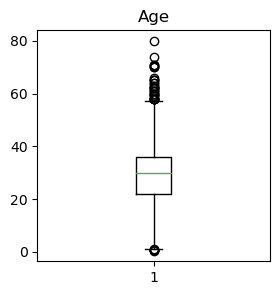

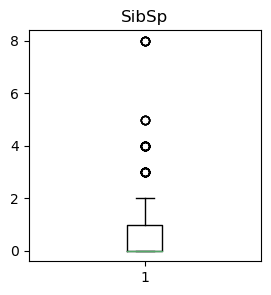

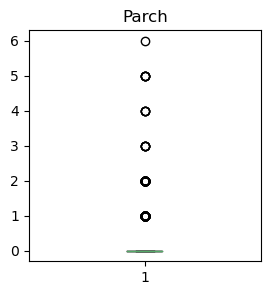

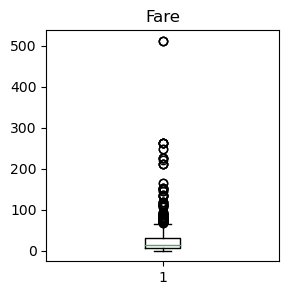

In [83]:
    # Definir variáveis

df2 = df.drop(columns=['Survived', 'Class_1', 'Class_2',
       'female','Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T'], axis = 1)

    # Boxplots
    
for i in df2.columns:
     fig = plt.figure(figsize=(3,3))
     fig.patch.set_facecolor('xkcd:white')
     plt.style.use('seaborn-deep')
     plt.boxplot(df2[i])
     plt.title(i)
     plt.show() 

#### 14º - Histograma das variáveis

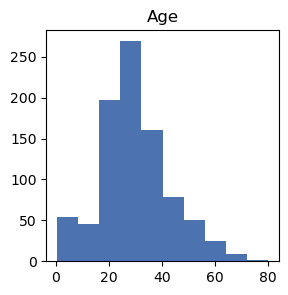

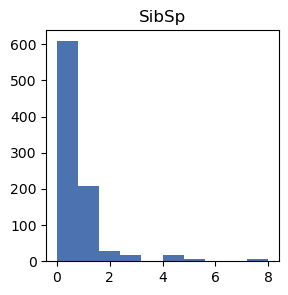

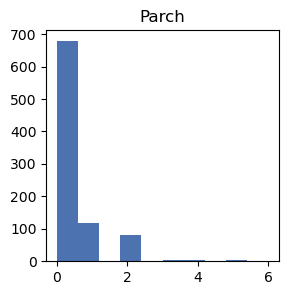

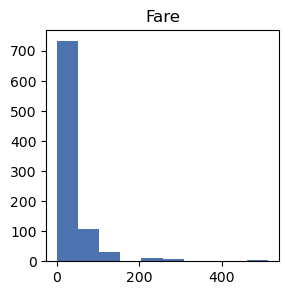

In [84]:
for i in df2.columns:
    fig = plt.figure(figsize=(3,3))
    fig.patch.set_facecolor('xkcd:white')
    plt.style.use('seaborn-deep')
    plt.hist(df2[i])
    plt.title(i)
    plt.show() 

#### 15º - Fazer a matriz de correlação

<AxesSubplot:>

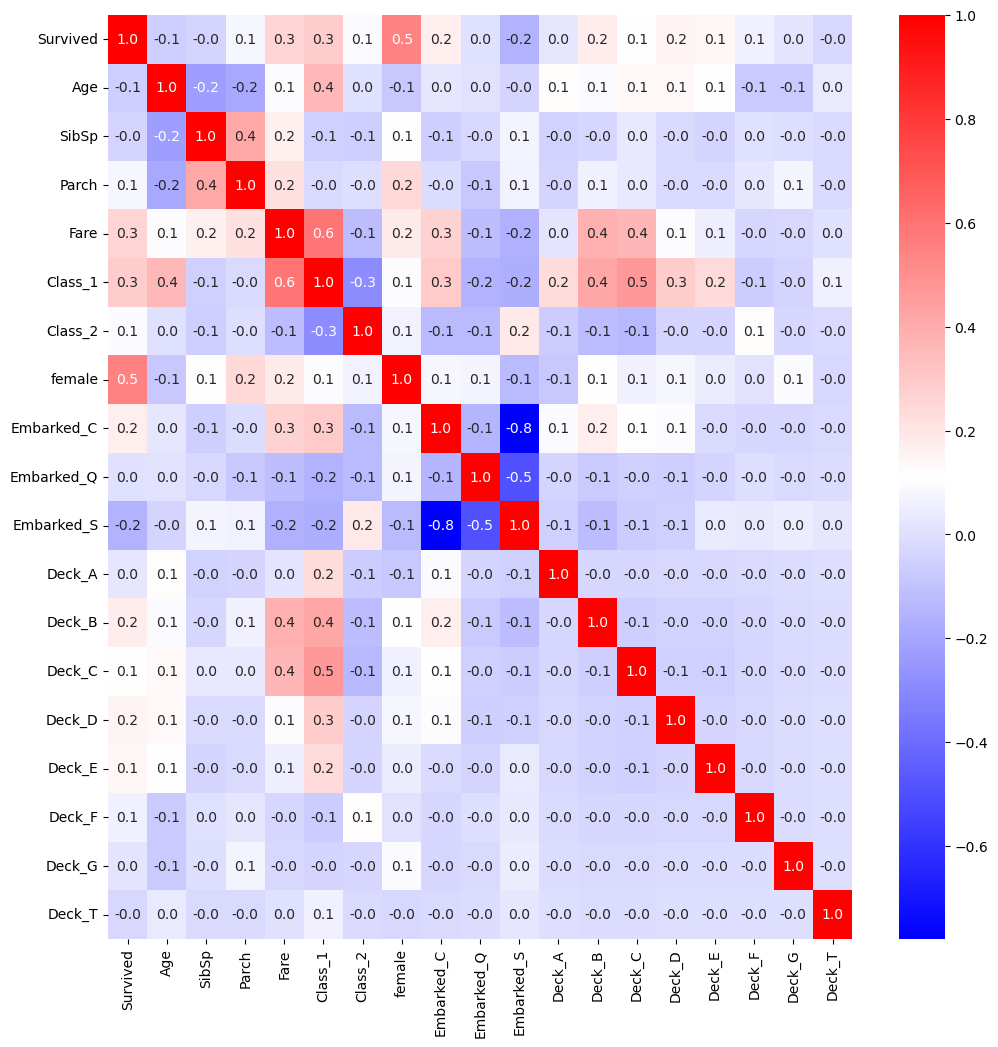

In [85]:
    # Fazendo a correlação
    
correl_matrix = df.corr()

    # Criando a figura
    
fig = plt.figure(figsize=(12,12))
fig.patch.set_facecolor('xkcd:white')
    
    # Criando o heatmap. Obs.: annot = info na cél, fmt = formato do nº, cmap = paleta de cores
    
sns.heatmap(correl_matrix, annot = True, fmt=".1f", cmap = 'bwr')

#### 16º - Selecionar as variáveis X e y

In [86]:
y = df['Survived']
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Class_1', 'Class_2',
       'female', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T']]

#### 17º - Fazer a reescala de X, através da forma Min Max.

In [87]:
    # Refazer a escala (de 0 a 1)
    
scaler = MinMaxScaler(feature_range = (0,1))

    # Transformar o X de acordo com a nova escala
    
rescaledX = scaler.fit_transform(X)

    # Atribuir os novos valores de X como dataframe ao X
        # Obs.: columns = X.columns, deixa os títulos das colunas como texto ao invés de número
        
X = pd.DataFrame(rescaledX, columns = X.columns)

    # Data frame X reescalado

X.describe()

,Age,SibSp,Parch,Fare,Class_1,Class_2,female,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.371806,0.065376,0.063599,0.062858,0.242424,0.206510,0.352413,0.188552,0.086420,0.722783,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122
std,0.168043,0.137843,0.134343,0.096995,0.428790,0.405028,0.477990,0.391372,0.281141,0.447876,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.371701,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.447097,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 18º - Separar os dados para teste e treino

In [88]:
test_size = 0.33    # 1/3 da amostra será usado para verrificar a precisão do modelo

seed = 1    # Controls the shuffling applied to the data before applying the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

### Decision Tree

#### 19º - Decision Tree - Criar um modelo com o algoritmo

In [89]:
    # Criar o modelo que será treinado
    
model_dt = DecisionTreeClassifier()

    # Treinar o modelo, com as respostas corretas

model_dt.fit(X_train, y_train)

    # Checar o desempenho do modelo com as informações de treino

predictions_dt = model_dt.predict(X_train) # descobrindo os valores de y train, através de X train
dt_as_treino = accuracy_score(y_train, predictions_dt) # comparando y train (true value) com y train (de predictions)

    # Avaliar o modelo com as informações de teste

predictions_dt = model_dt.predict(X_test) # descobrindo os valores de y test, através dos valores de X test
dt_as_teste = accuracy_score(y_test, predictions_dt) # comparando y test (true value) com y test (de predictions)

    # Resumo
    
print(f'=> Decision tree\n'
      + '\n'
      + f'Accuracy Score do modelo com as informações de treino é {dt_as_treino}.\n'
      + f'Accuracy Score do modelo com as informações de teste é {dt_as_teste}.\n')

=> Decision tree

Accuracy Score do modelo com as informações de treino é 0.9932885906040269.
Accuracy Score do modelo com as informações de teste é 0.6983050847457627.



#### 20º - Descobrir a importância de cada variável no algoritmo de Decision Tree

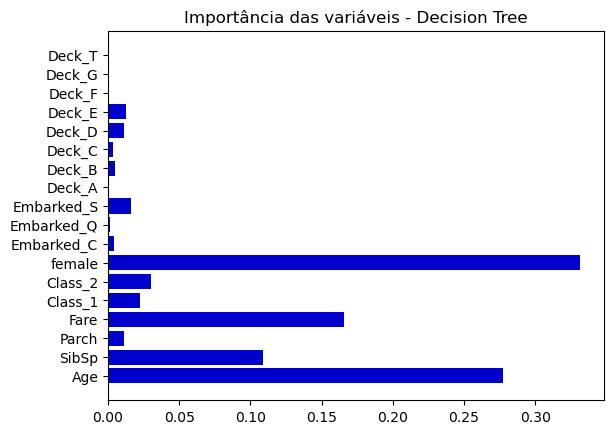

In [90]:
plt.barh(X.columns, model_dt.feature_importances_, color = 'mediumblue')
plt.title('Importância das variáveis - Decision Tree')
plt.show()  

#### 21º - Visualizar a Decision Tree

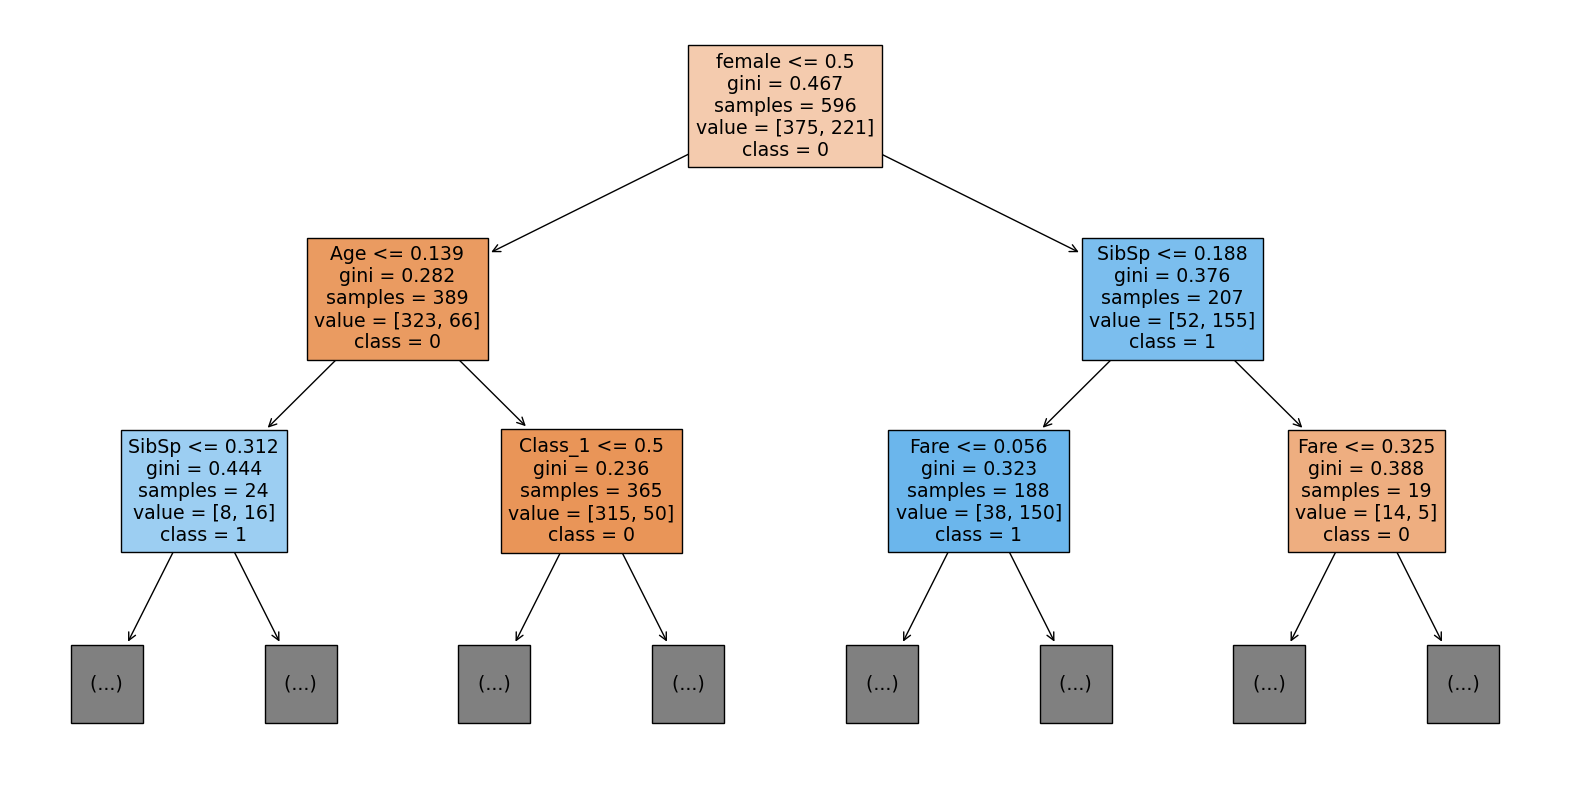

In [91]:
target_names = ['0','1'] # são os valores de y
feature_names = X.columns # são os valores de  X


fig = plt.figure(figsize=(20,10))
tree_plot = tree.plot_tree(model_dt,
                           max_depth = 2,
                           feature_names = feature_names,
                           class_names = target_names,
                           filled = True)

### Regressão Logística

#### 22º - Regressão logística - Criar um modelo com o algoritmo

In [92]:
    # Criar o modelo, que será treinado
    
model_rl = LogisticRegression()

    # Treinar o modelo

model_rl.fit(X_train, y_train)

    # Checar o desempenho do modelo com as informações de treino

predictions_rl = model_rl.predict(X_train)
rl_as_treino = accuracy_score(y_train, predictions_rl)

    # Avaliar o modelo com as informações de teste

predictions_rl = model_rl.predict(X_test) # descobrindo os valores de y test, através dos valores de X test
rl_as_teste = accuracy_score(y_test, predictions_rl) # comparando y test (true value) com y test (de predictions)

    # Resumo

print(f'=> Regressão logística\n'
      + '\n'
      + f'Accuracy Score do modelo com as informações de treino é {rl_as_treino}.\n'
      + f'Accuracy Score do modelo com as informações de teste é {rl_as_teste}.\n')

=> Regressão logística

Accuracy Score do modelo com as informações de treino é 0.8221476510067114.
Accuracy Score do modelo com as informações de teste é 0.7762711864406779.



#### 23º - Descobrir a importância de cada variável no algoritmo de Regressão Logística

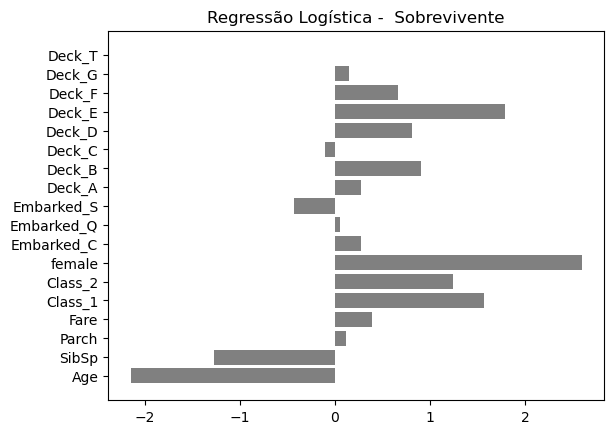

In [93]:
fig = plt.figure()
plt.barh(X.columns, model_rl.coef_[0],color='grey') # são os coeficientes
plt.title(f'Regressão Logística -  Sobrevivente')
plt.show()  

#### 24º Visualizar gráficos de Regressão Logística

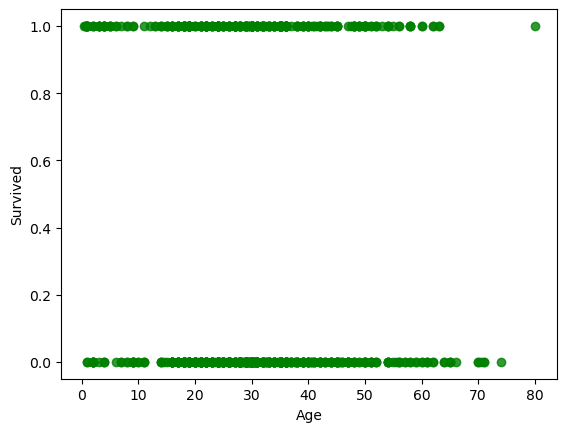

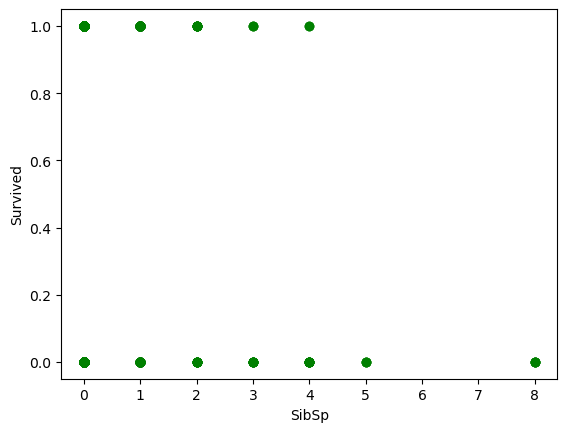

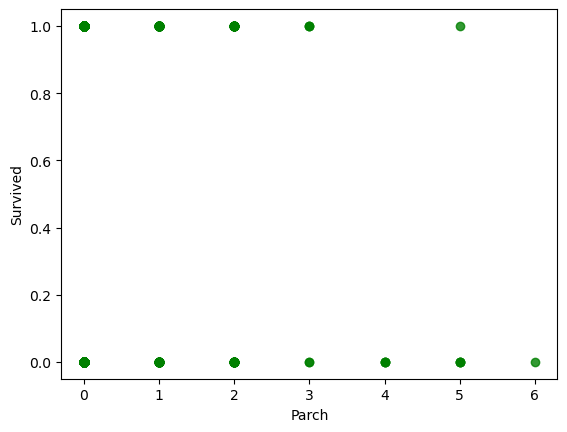

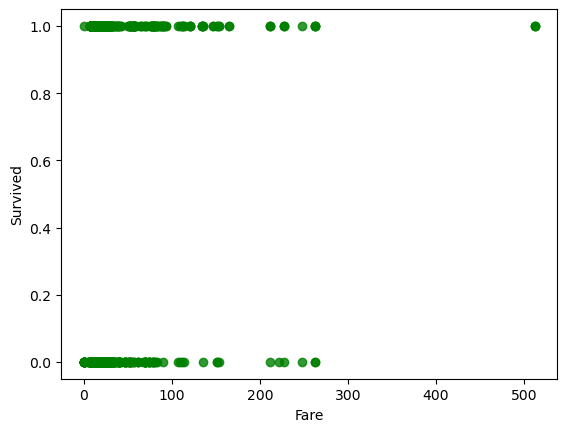

In [139]:
for i in df3.columns:
    sns.regplot(x=df[i], y=df['Survived'], data = df, fit_reg = False, color = 'green')
    plt.show()

#### 25º - Descobrir qual modelo teve a melhor performance

In [95]:
if max(dt_as_teste,rl_as_teste) == dt_as_teste:
    print("O modelo de Decision Tree teve uma performance melhor nos dados de teste.")
else:
    print("O modelo de Regressão logística teve uma performance melhor nos dados de teste.")

O modelo de Regressão logística teve uma performance melhor nos dados de teste.
